### 加载 MNIST 数据集

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist/mnist.npz')

print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))

Using TensorFlow backend.


(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


### 数据处理：规范化
```PYTHON
channels_last corresponds to inputs with shape(batch, height, width, channels)while channels_first corresponds to inputs with shape(bath, height, width)
It defaults to the image_data format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last.
```

In [2]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_train.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(x_train.shape, type(x_train))
print(x_test.shape, type(x_test))

(60000, 28, 28, 1) <class 'numpy.ndarray'>
(10000, 28, 28, 1) <class 'numpy.ndarray'>


In [3]:
# 将数据类型转化为 float32
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


### 统计训练数据中各标签数量

In [4]:
import numpy as np
import matplotlib.pyplot as plt

label, count = np.unique(y_train, return_counts = True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


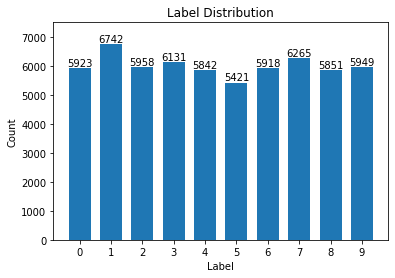

In [5]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align = 'center')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(label)
plt.ylim(0, 7500)

for a, b in zip(label, count):
    plt.text(a, b, '%d' % b, ha = 'center', va = 'bottom', fontsize = 10)
    
plt.show()

In [6]:
from keras.utils import np_utils

nb_classes = 10
print('Shape before one-hot encoding: ', y_train.shape)
Y_train = np_utils.to_categorical(y_train, nb_classes)
print('Shape before one-hot encoding: ', Y_train.shape)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Shape before one-hot encoding:  (60000,)
Shape before one-hot encoding:  (60000, 10)


In [7]:
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 使用 Keras sequential model 定义 MNIST CNN 网络

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
## Feature Extraction
# 第 1 层卷积， 32个 3*3 的卷积核，激活函数使用 relu
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu',
                input_shape = input_shape))
# 第 2 层卷积， 64 个 3*3 的卷积核，激活函数使用 relu
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu',
                input_shape = input_shape))
# 最大池化层，池化窗口 2*2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout 25% 的输入神经元
model.add(Dropout(0.25))
# 将 Pooled feature map 摊平后输入全连接网络
model.add(Flatten())


## Classification
# 全连接层
model.add(Dense(128, activation = 'relu'))
# Dropout 50% 的输入神经元
model.add(Dropout(0.5))
# 使用 softmax 激活函数做多分类，输出各数字的概率
model.add(Dense(nb_classes, activation = 'softmax'))

W1119 22:08:35.317215 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 22:08:35.331254 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 22:08:35.333787 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1119 22:08:35.362837 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1119 22:08:35.364842 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\backend\tensorflow_backend.py:133: The 

### 查看 MNIST CNN 模型网络结构

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 26, 26, 32]
[None, 24, 24, 64]
[None, 12, 12, 64]
[None, 12, 12, 64]
[None, None]
[None, 128]
[None, 128]
[None, 10]


### 编译模型

```PYTHON
# compile 的本质实际上是在做数据流图中的反向传播的过程
compile(optimizer, loss = None, metrics = None, loss_weights = None,
       sample_weight_mode = None, weighted_metrics = None, 
        target_tensors = None)
```

In [13]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], 
             optimizer = 'adam')

W1119 22:13:25.971418 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1119 22:13:25.991504 160644 deprecation_wrapper.py:119] From e:\python\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 训练模型，并将指标保存到 history 中
```PYTHON
fit(x = None, y = None, batch_size = None, epochs = 1, verbose = 1,
   callbacks = None,validation_split = 0.0, validation_data = None,
   shuffle = True,class_weight = None, sample_weight = None,
   initial_epoch = 0, steps_per_epoch = None, validation_steps = None)

```

In [14]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 5, verbose = 2, 
                   validation_data = (X_test, Y_test))

W1119 22:14:00.284679 160644 deprecation.py:323] From e:\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 69s - loss: 0.2412 - acc: 0.9260 - val_loss: 0.0582 - val_acc: 0.9811
Epoch 2/5
 - 63s - loss: 0.0831 - acc: 0.9755 - val_loss: 0.0399 - val_acc: 0.9863
Epoch 3/5
 - 63s - loss: 0.0610 - acc: 0.9822 - val_loss: 0.0348 - val_acc: 0.9883
Epoch 4/5
 - 64s - loss: 0.0524 - acc: 0.9835 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 5/5
 - 64s - loss: 0.0429 - acc: 0.9865 - val_loss: 0.0341 - val_acc: 0.9893


### 可视化指标

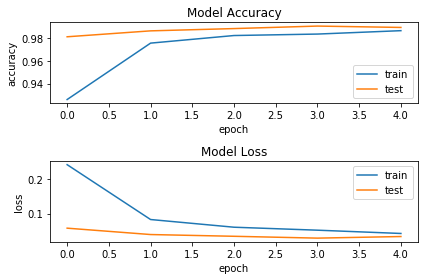

In [15]:
fig = plt.figure()
# subplot指的是绘制子图
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# title指的是给上面的子图去绘制标题
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.tight_layout()

### 保存模型
```PYTHON
You can use model.save(filepath) to save Keras model into a single HDF5 file which will contain:
    - the architecture of the model, allowing to re-create the model
    - the weights of the model 
    - the training configuration (loss, optimizer)
    - the state of the optimizer, allowing to resume training exactly where you left off
   
You can then use keras.models.load_model(filepath) to reinstantiate your model.load_model will also take care of compiling the model using the saved training configuration(unless the model was never compiled in the first place).
```

In [17]:
import os
import tensorflow.gfile as gfile

save_dir = './mnist/model'

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist_CNN.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model as %s ' % model_path)

Saved trained model as ./mnist/model\keras_mnist_CNN.h5 


### 加载模型

In [23]:
from keras.models import load_model

mnist_model = load_model(model_path)

### 统计模型在测试集上的分类结果

In [25]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test)

print('Test Loss: {}'.format(loss_and_metrics[0]))
print('Test Accuracy: {}'.format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print('Classified correctly count: {}'.format(len(correct_indices)))
print('Classified correctly count: {}' .format(len(incorrect_indices)))

10000/10000 [==============================] - 2s 230us/step
Test Loss: 0.03414157071991704
Test Accuracy: 98.92999999999999
Classified correctly count: 9893
Classified correctly count: 107


In [26]:
correct_indices.shape

(9893,)